In [5]:
import shutil
import pandas as pd
import numpy as np
import SimpleITK as sitk
import os
from tqdm.notebook import tqdm
import cv2

import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader

from trainer.utils import split_mask, open_ct, open_mask
from trainer.loader import Ds
from trainer.Trainer import Trainer
from nonlocalunet.models import NonLocalUnet
from torchmed.images import to_numpy

import seaborn as sns

In [6]:
df = pd.read_csv('data/df.csv')

In [7]:
val_indexes = list(range(0,1))
train_indexes = list(range(1, 139))
shape = [4, 96,96]
train_batch_size = 2
val_batch_size = 2

train_ds = Ds(train_indexes, shape)
train_dl = DataLoader(train_ds, batch_size=train_batch_size, shuffle=True, num_workers=8)

val_ds = Ds(val_indexes, shape)
val_dl = DataLoader(val_ds, batch_size=val_batch_size, shuffle=True, num_workers=8)

In [8]:
model = NonLocalUnet(1, 7).to('cuda')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)
criterion = torch.nn.BCELoss()
device = 'cuda'

In [5]:
trainer = Trainer(model, 7, optimizer, scheduler, criterion, train_dl, val_indexes, device, 'first run')

In [6]:
trainer.train(1000)

Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

Train:   0%|          | 0/69 [00:00<?, ?it/s]

Train:   0%|          | 0/69 [00:00<?, ?it/s]

Train:   0%|          | 0/69 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Model has been saved
Traceback (most recent call last):
  File "/home/aykhan/Desktop/Non-local-U-Net-Pytorch/trainer/Trainer.py", line 205, in train
    try:
  File "/home/aykhan/Desktop/Non-local-U-Net-Pytorch/trainer/Trainer.py", line 129, in train_one_epoch
    for idx, (x, labels) in t:
  File "/home/aykhan/anaconda3/lib/python3.8/site-packages/tqdm/notebook.py", line 248, in __iter__
    for obj in super(tqdm_notebook, self).__iter__():
  File "/home/aykhan/anaconda3/lib/python3.8/site-packages/tqdm/std.py", line 1178, in __iter__
    for obj in iterable:
  File "/home/aykhan/anaconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 521, in __next__
    data = self._next_data()
  File "/home/aykhan/anaconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1186, in _next_data
    idx, data = self._get_data()
  File "/home/aykhan/anaconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1152, in _get_data
    success, data = self

TypeError: object of type 'NoneType' has no len()

In [9]:
a, b = next(iter(train_dl))

In [10]:
pred = model(a.to('cuda').float())

<AxesSubplot:ylabel='Count'>

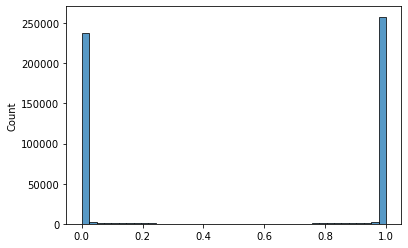

In [11]:
sns.histplot(to_numpy(pred.flatten()))